# Going deeper with Tensorflow

In this seminar, we're going to play with [Tensorflow](https://www.tensorflow.org/) and see how it helps us build deep learning models.

If you're running this notebook outside the course environment, you'll need to install tensorflow:
* `pip install tensorflow` should install cpu-only TF on Linux & Mac OS
* If you want GPU support from offset, see [TF install page](https://www.tensorflow.org/install/)

In [1]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1)
print(gpu_options)
s = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


per_process_gpu_memory_fraction: 0.1
allow_growth: true



# Save and Restore example

In [2]:
# define a Neural network

import numpy as np

n_inputs = 3 # states
n_neurons = 5
n_outputs = 2 # acrions

W1 = tf.Variable(initial_value = np.sqrt(1 / n_inputs) * np.random.randn(n_inputs, n_neurons), dtype='float32', name='W1')
b1 = tf.Variable(initial_value = np.zeros([n_neurons]), dtype='float32', name='b1')

W2 = tf.Variable(initial_value = np.sqrt(1 / n_neurons) * np.random.randn(n_neurons, n_outputs), dtype='float32', name='W2')

input_X = tf.placeholder('float32',shape=(None, n_inputs), name='my_input')

print(input_X)

print(W1)
print(b1)
print(W2)

z1 = tf.matmul(input_X, W1) + b1
z2 = tf.sigmoid(z1)

z3 = tf.matmul(z2, W2, name="my_output")
print(z3)

Tensor("my_input:0", shape=(?, 3), dtype=float32)
<tf.Variable 'W1:0' shape=(3, 5) dtype=float32_ref>
<tf.Variable 'b1:0' shape=(5,) dtype=float32_ref>
<tf.Variable 'W2:0' shape=(5, 2) dtype=float32_ref>
Tensor("my_output:0", shape=(?, 2), dtype=float32)


In [3]:
# do some inference with random weights and save

init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    preds = sess.run([z3], feed_dict={input_X: [[2.5, 3.2, 4.1]]})
    print(preds)
    preds = sess.run([z3], feed_dict={input_X: [[1, 2, 3]]})
    print(preds)
    print("W1 : %s" % W1.eval())
    print("b1 : %s" % b1.eval())
    print("W2 : %s" % W2.eval())
    saver = tf.train.Saver()
    save_path = saver.save(sess, "/tmp/model.ckpt")


[array([[-1.5844781, -1.2009217]], dtype=float32)]
[array([[-1.6447468, -1.0458664]], dtype=float32)]
W1 : [[ 0.48132244 -0.68164647 -0.5747833  -0.06352745  0.3654987 ]
 [-0.13257131  0.34380814  0.6207427  -0.18583378  0.59003067]
 [ 0.84863347 -0.31852636 -1.0997666  -0.20270477 -0.01714431]]
b1 : [0. 0. 0. 0. 0.]
W2 : [[-0.5648686  -1.0002866 ]
 [-0.5688741   0.33127433]
 [ 0.03937491 -0.16862135]
 [-1.1269326   0.3109371 ]
 [-0.812789   -0.32706356]]


In [4]:
!ls -ltrh /tmp/

total 44K
drwx------ 2 philippew philippew 4.0K Jan  1  1970 orbit-philippew
drwx------ 3 root      root      4.0K Jun  6 10:30 systemd-private-e60540b19ded4a40b05ca99ab3fe65b5-systemd-timesyncd.service-w605lY
drwx------ 3 root      root      4.0K Jun  6 10:30 systemd-private-e60540b19ded4a40b05ca99ab3fe65b5-colord.service-zGhbxx
drwx------ 3 root      root      4.0K Jun  6 10:30 systemd-private-e60540b19ded4a40b05ca99ab3fe65b5-rtkit-daemon.service-jVvPqN
-rw------- 1 philippew philippew    0 Jun  6 11:03 config-err-iZBJ9t
-rw-rw-r-- 1 philippew philippew    0 Jun  6 11:03 unity_support_test.0
drwx------ 2 philippew philippew 4.0K Jun  6 11:04 gnome-software-NLPBKZ
drwx------ 2 philippew philippew 4.0K Jun  6 12:39 firefox_philippew
-rw-rw-r-- 1 philippew philippew  173 Jun  6 14:15 model.ckpt.index
-rw-rw-r-- 1 philippew philippew  120 Jun  6 14:15 model.ckpt.data-00000-of-00001
-rw-rw-r-- 1 philippew philippew   87 Jun  6 14:15 checkpoint
-rw-rw-r-- 1 philippew philippew 4.8K Jun  6 

In [5]:
# restore and check by inference we get same previous results

import tensorflow as tf
 
sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('/tmp/model.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('/tmp'))
 
graph = tf.get_default_graph()

inputs = graph.get_tensor_by_name('my_input:0')
feed_dict ={inputs: [[2.5, 3.2, 4.1]]}
op_to_restore = graph.get_tensor_by_name("my_output:0")
 
print(sess.run(op_to_restore, feed_dict))
 


INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
[[-1.5844781 -1.2009217]]


# Warming up
For starters, let's implement a python function that computes the sum of squares of numbers from 0 to N-1.
* Use numpy or python
* An array of numbers 0 to N - numpy.arange(N)

In [6]:
import numpy as np
def sum_squares(N):
    return np.sum(np.arange(N)**2)

In [7]:
np.arange(10)**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [8]:
%%time
sum_squares(10**8)

CPU times: user 220 ms, sys: 84 ms, total: 304 ms
Wall time: 287 ms


662921401752298880

# Tensoflow teaser

Doing the very same thing

In [9]:
#I gonna be your function parameter
N = tf.placeholder('int64', name="input_to_your_function")

#i am a recipe on how to produce sum of squares of arange of N given N
result = tf.reduce_sum((tf.range(N)**2))

In [10]:
%%time
#example of computing the same as sum_squares
print(result.eval({N:10**8}))

662921401752298880
CPU times: user 480 ms, sys: 184 ms, total: 664 ms
Wall time: 438 ms


In [11]:
!ls

checkpoint			output.txt
crossentropy_method.ipynb	preprocessed_mnist.py
deep_crossentropy_method.ipynb	__pycache__
grading.py			recap_ml.ipynb
gym_interface.ipynb		recap_tensorflow.ipynb
lecure1_2018.pdf		RL.py
MNIST_data			submit.py
model.ckpt.data-00000-of-00001	tboard
model.ckpt.index		train.csv
model.ckpt.meta


In [12]:
from tensorflow.python.tools import inspect_checkpoint as chkp


with tf.Session() as sess:    
    saver = tf.train.import_meta_graph('model.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    print(sess.run('w1:0'))
    print(sess.run('w2:0'))

##Model has been restored. Above statement will print the saved value of w1.

INFO:tensorflow:Restoring parameters from ./model.ckpt


NotFoundError: Key W1 not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_6_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'save/RestoreV2', defined at:
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-9131fa61d49d>", line 14, in <module>
    saver = tf.train.Saver()
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1311, in __init__
    self.build()
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1320, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1357, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 809, in _build_internal
    restore_sequentially, reshape)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 448, in _AddRestoreOps
    restore_sequentially)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 860, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1458, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/home/philippew/anaconda3/envs/pythonx/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key W1 not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_6_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [ ]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model.ckpt.meta')
    saver.restore(sess, 'model.ckpt')
    graph = tf.get_default_graph() 
    
    
    print(tf.get_default_graph().get_all_collection_keys())
    for v in tf.get_default_graph().get_collection("variables"):
        print(v)
    for v in tf.get_default_graph().get_collection("trainable_variables"):
        print(v)
    
    placeholders = [ op for op in graph.get_operations() if op.type == "Placeholder"]
    print(placeholders)
    
    inputs = tf.get_collection('inputs')
    output = tf.get_collection('output')
    print(inputs)
    print(output)
    #outputTensors = sess.run(output, feed_dict={images: np.array(an_image)})

# How does it work?
1. define placeholders where you'll send inputs;
2. make symbolic graph: a recipe for mathematical transformation of those placeholders;
3. compute outputs of your graph with particular values for each placeholder
  * output.eval({placeholder:value}) 
  * s.run(output, {placeholder:value})

* So far there are two main entities: "placeholder" and "transformation"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be int32/64, floats of booleans (uint8) of various size.

* You can define new transformations as an arbitrary operation on placeholders and other transformations
 * tf.reduce_sum(tf.arange(N)\**2) are 3 sequential transformations of placeholder N
 * There's a tensorflow symbolic version for every numpy function
   * `a+b, a/b, a**b, ...` behave just like in numpy
   * np.mean -> tf.reduce_mean
   * np.arange -> tf.range
   * np.cumsum -> tf.cumsum
   * If if you can't find the op you need, see the [docs](https://www.tensorflow.org/api_docs/python).
 
 
Still confused? We gonna fix that.

In [ ]:
#Default placeholder that can be arbitrary float32 scalar, vertor, matrix, etc.
arbitrary_input = tf.placeholder('float32')

#Input vector of arbitrary length
input_vector = tf.placeholder('float32',shape=(None,))

#Input vector that _must_ have 10 elements and integer type
fixed_vector = tf.placeholder('int32',shape=(10,))

#Matrix of arbitrary n_rows and 15 columns (e.g. a minibatch your data table)
input_matrix = tf.placeholder('float32',shape=(None,15))

#You can generally use None whenever you don't need a specific shape
input1 = tf.placeholder('float64',shape=(None,100,None))
input2 = tf.placeholder('int32',shape=(None,None,3,224,224))

In [ ]:
#elementwise multiplication
double_the_vector = input_vector*2

#elementwise cosine
elementwise_cosine = tf.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector**2 - input_vector


In [ ]:
#Practice time: create two vectors of type float32
#my_vector = <student.init_float32_vector()>
#my_vector2 = <student.init_one_more_such_vector()>

my_vector = tf.placeholder('float32',shape=(None,))
my_vector2 = tf.placeholder('float32',shape=(None,))

In [ ]:
#Write a transformation(recipe):
#(vec1)*(vec2) / (sin(vec1) +1)
my_transformation = my_vector * my_vector2 / (tf.sin(my_vector) + 1)

In [13]:
print(my_transformation)
#it's okay, it's a symbolic graph

NameError: name 'my_transformation' is not defined

In [14]:
#
dummy = np.arange(5).astype('float32')

my_transformation.eval({my_vector:dummy,my_vector2:dummy[::-1]})

NameError: name 'my_transformation' is not defined

### Visualizing graphs

It's often useful to visualize the computation graph when debugging or optimizing. 
Interactive visualization is where tensorflow really shines as compared to other frameworks. 

There's a special instrument for that, called Tensorboard. You can launch it from console:

```tensorboard --logdir=/tmp/tboard --port=7007```

If you're pathologically afraid of consoles, try this:

```os.system("tensorboard --logdir=/tmp/tboard --port=7007 &"```

_(but don't tell anyone we taught you that)_

In [15]:
import os

os.system("tensorboard --logdir=/tmp/tboard --port=7007 &")

0

In [16]:
# launch tensorflow the ugly way, uncomment if you need that
import os
port = 6000 + os.getuid()
print("Port: %d" % port)
!killall tensorboard
os.system("tensorboard --logdir=./tboard --port=%d &" % port)

# show graph to tensorboard
writer = tf.summary.FileWriter("./tboard", graph=tf.get_default_graph())
writer.close()

Port: 7000


One basic functionality of tensorboard is drawing graphs. One you've run the cell above, go to `localhost:7007` in your browser and switch to _graphs_ tab in the topbar. 

Here's what you should see:

<img src="https://s12.postimg.org/a374bmffx/tensorboard.png" width=480>

Tensorboard also allows you to draw graphs (e.g. learning curves), record images & audio ~~and play flash games~~. This is useful when monitoring learning progress and catching some training issues.

One researcher said:
```
If you spent last four hours of your worktime watching as your algorithm prints numbers and draws figures, you're probably doing deep learning wrong.
```

You can read more on tensorboard usage [here](https://www.tensorflow.org/get_started/graph_viz)

# Do It Yourself

__[2 points max]__

In [17]:
%%time
dummy = np.arange(5).astype('float32')
vec1 = dummy
vec2 = dummy[::-1]
mse = np.linalg.norm(vec1 - vec2)**2 / len(vec1)
print(mse)
print(np.sum((vec1 - vec2)**2) / len(vec1))

8.0000001940296
8.0
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 691 µs


In [18]:
%%time

# Quest #1 - implement a function that computes a mean squared error of two input vectors
# Your function has to take 2 vectors and return a single number

#<student.define_inputs_and_transformations()>
#mse =<student.define_transformation()>
#compute_mse = lambda vector1, vector2: <how to run you graph?>

vec1 = tf.placeholder('float32',shape=(None,))
vec2 = tf.placeholder('float32',shape=(None,))
#mse = tf.norm(vec1 - vec2)
mse = tf.reduce_sum((vec1-vec2)**2) / tf.to_float(tf.size(vec1))
print(mse)

dummy = np.arange(5).astype('float32')

print(mse.eval({vec1:dummy, vec2:dummy[::-1]}))

compute_mse = lambda vector1, vector2: mse.eval({vec1:vector1, vec2:vector2})

Tensor("truediv:0", shape=(), dtype=float32)
8.0
CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 23.9 ms


In [19]:
print(np.sqrt(0.659442))

0.812060342585451


In [20]:
# Tests
from sklearn.metrics import mean_squared_error

for n in [1,5,10,10**3]:
    
    elems = [np.arange(n),np.arange(n,0,-1), np.zeros(n),
             np.ones(n),np.random.random(n),np.random.randint(100,size=n)]
    
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(mean_squared_error(el,el_2))
            my_mse = compute_mse(el,el_2)
            if not np.allclose(true_mse,my_mse):
                print('Wrong result:')
                print('mse(%s,%s)' % (el,el_2))
                print("should be: %f, but your function returned %f" % (true_mse,my_mse))
                raise(ValueError,"oops")

print("All tests passed")    

All tests passed


# variables

The inputs and transformations have no value outside function call. This isn't too comfortable if you want your model to have parameters (e.g. network weights) that are always present, but can change their value over time.

Tensorflow solves this with `tf.Variable` objects.
* You can assign variable a value at any time in your graph
* Unlike placeholders, there's no need to explicitly pass values to variables when `s.run(...)`-ing
* You can use variables the same way you use transformations 
 

In [21]:
#creating shared variable
shared_vector_1 = tf.Variable(initial_value=np.ones(5))

In [22]:
print(shared_vector_1)
print(np.ones(5))

<tf.Variable 'Variable:0' shape=(5,) dtype=float64_ref>
[1. 1. 1. 1. 1.]


In [23]:
#initialize variable(s) with initial values
s.run(tf.global_variables_initializer())

#evaluating shared variable (outside symbolicd graph)
print("initial value", s.run(shared_vector_1))

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

initial value [1. 1. 1. 1. 1.]


In [24]:
#setting new value
s.run(shared_vector_1.assign(np.arange(5)))

#getting that new value
print("new value", s.run(shared_vector_1))


new value [0. 1. 2. 3. 4.]


# tf.gradients - why graphs matter
* Tensorflow can compute derivatives and gradients automatically using the computation graph
* Gradients are computed as a product of elementary derivatives via chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

It can get you the derivative of any graph as long as it knows how to differentiate elementary operations

In [25]:
my_scalar = tf.placeholder('float32')

scalar_squared = my_scalar**2

#a derivative of scalar_squared by my_scalar
derivative = tf.gradients(scalar_squared, my_scalar)[0]

In [26]:
print(my_scalar)
print(scalar_squared)
print(derivative)
print(derivative.eval({my_scalar:3}))
print(derivative.eval({my_scalar:4}))

Tensor("Placeholder_2:0", dtype=float32)
Tensor("pow_2:0", dtype=float32)
Tensor("gradients/pow_2_grad/Reshape:0", dtype=float32)
6.0
8.0


In [27]:
x = np.linspace(-3, 3)
print(x)

[-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.3877551
 -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.7755102  -1.65306122
 -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
 -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
 -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
  1.40816327  1.53061224  1.65306122  1.7755102   1.89795918  2.02040816
  2.14285714  2.26530612  2.3877551   2.51020408  2.63265306  2.75510204
  2.87755102  3.        ]


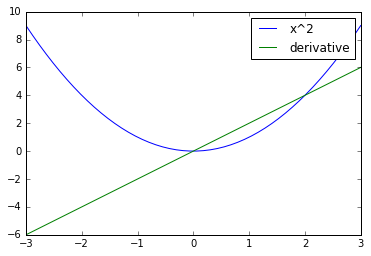

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3,3)
x_squared, x_squared_der = s.run([scalar_squared, derivative],
                                 {my_scalar:x})

plt.plot(x, x_squared,label="x^2")
plt.plot(x, x_squared_der, label="derivative")
plt.legend();

# Why that rocks

In [29]:
my_vector = tf.placeholder('float32',[None])

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = tf.reduce_mean((my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2)*tf.exp((my_scalar-4)**2)/(1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2))/(1+tf.exp(-(my_scalar-4)**2)))**2

#der_by_scalar = <student.compute_grad_over_scalar()>
#der_by_vector = <student.compute_grad_over_vector()>

In [30]:
#a derivative of scalar_squared by my_scalar
der_by_scalar = tf.gradients(weird_psychotic_function, my_scalar)[0]
der_by_vector = tf.gradients(weird_psychotic_function, my_vector)[0]

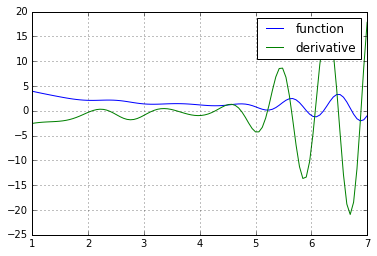

In [31]:
#Plotting your derivative
scalar_space = np.linspace(1, 7, 100)

y = [s.run(weird_psychotic_function, {my_scalar:x, my_vector:[1, 2, 3]})
     for x in scalar_space]

plt.plot(scalar_space, y, label='function')

y_der_by_scalar = [s.run(der_by_scalar, {my_scalar:x, my_vector:[1, 2, 3]})
     for x in scalar_space]

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid()
plt.legend();

# Almost done - optimizers

While you can perform gradient descent by hand with automatic grads from above, tensorflow also has some optimization methods implemented for you. Recall momentum & rmsprop?

In [32]:
print(np.zeros(2))
print(np.arange(1,3))
print(np.random.randn(2))

[0. 0.]
[1 2]
[-0.34002716  0.2366729 ]


In [33]:
y_guess = tf.Variable(np.zeros(2,dtype='float32'))
y_true = tf.range(1,3,dtype='float32')

loss = tf.reduce_mean((y_guess - y_true + tf.random_normal([2]))**2) 

optimizer = tf.train.MomentumOptimizer(0.01, 0.9).minimize(loss, var_list=y_guess)

#same, but more detailed:
#updates = [[tf.gradients(loss, y_guess)[0], y_guess]]
#optimizer = tf.train.MomentumOptimizer(0.01,0.9).apply_gradients(updates)

print(optimizer)
#tf.train.MomentumOptimizer()

name: "Momentum"
op: "NoOp"
input: "^Momentum/update_Variable_1/ApplyMomentum"



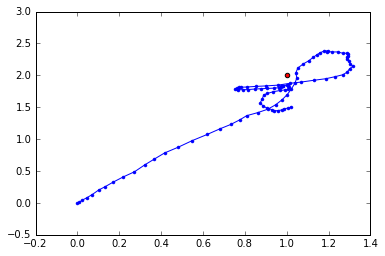

In [34]:
from IPython.display import clear_output

s.run(tf.global_variables_initializer())

guesses = [s.run(y_guess)]

for _ in range(100):
    s.run(optimizer)
    guesses.append(s.run(y_guess))
    
    clear_output(True)
    plt.plot(*zip(*guesses),marker='.')
    plt.scatter(*s.run(y_true),c='red')
    plt.show()

# Logistic regression example
Implement the regular logistic regression training algorithm

Tips:
* Use a shared variable for weights
* X and y are potential inputs
* Compile 2 functions:
 * `train_function(X, y)` - returns error and computes weights' new values __(through updates)__
 * `predict_fun(X)` - just computes probabilities ("y") given data
 
 
We shall train on a two-class MNIST dataset
* please note that target `y` are `{0,1}` and not `{-1,1}` as in some formulae

In [35]:
from sklearn.datasets import load_digits
mnist = load_digits(2)

X,y = mnist.data, mnist.target

print("y [shape - %s]:" % (str(y.shape)), y[:10])
print("X [shape - %s]:" % (str(X.shape)))

y [shape - (360,)]: [0 1 0 1 0 1 0 0 1 1]
X [shape - (360, 64)]:


(360, 64)
(360,)
1
182
178


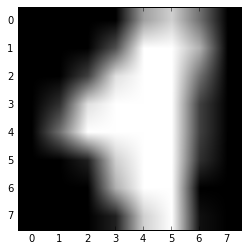

In [36]:
print(X.shape)
print(y.shape)
plt.imshow(X[50].reshape([8,8]), cmap='gray')
print(y[3])
print(np.sum(y == 1))
print(np.sum(y == 0))

X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0.]]
y:
 [0 1 0 1 0 1 0 0 1 1]


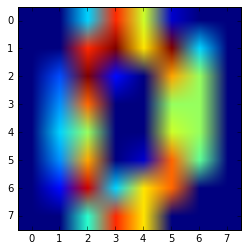

In [37]:
print('X:\n',X[:3,:10])
print('y:\n',y[:10])
plt.imshow(X[0].reshape([8,8]))

In [38]:
print(np.random.randn(64))

[ 1.24102583  1.33229747 -0.02974304  0.54551893 -2.04860563  1.16697489
  0.30249085 -1.10303971 -0.12600425  0.82140067 -0.58321858  0.57083155
 -0.83086428  0.31681855 -0.39573612  1.58989998 -0.13828303 -0.28526706
  0.89622399  1.75751858 -0.48900217  0.27432546 -0.06222185  1.73264823
 -1.2411624   0.6886384   1.20913807  0.78536579  1.13350957  2.02973162
 -1.71168581 -0.42787553 -0.28746953  1.15804538  1.88273785  0.04701926
  0.07265437  0.3611458  -0.31108932  0.68468586  1.27948779  1.60415894
 -0.87186554  1.22369815 -1.55215296 -0.40394942  0.06998123  1.739028
 -1.26085381 -0.23552705  0.87743689 -0.07144262  0.73642036  0.5606369
 -1.73051229  0.73255924  0.60699839 -2.27149968 -1.09472199 -0.8860759
 -0.04072338 -2.16614047  0.45242062 -1.78041085]


In [39]:
# inputs and shareds
#weights = <student.code_variable()>
#input_X = <student.code_placeholder()>
#input_y = <student.code_placeholder()>

#input_X = tf.placeholder('int8',shape=(8, 8))
#weights = tf.Variable(initial_value=np.random.randn(64, 2), dtype='float32')
weights = tf.Variable(initial_value=np.zeros([64, 2]), dtype='float32')
input_X = tf.placeholder('float32',shape=(None, 64))
input_y = tf.placeholder('uint8', shape=(None,))

print(input_X)
print(input_y)
print(weights)

Tensor("Placeholder_4:0", shape=(?, 64), dtype=float32)
Tensor("Placeholder_5:0", shape=(?,), dtype=uint8)
<tf.Variable 'Variable_2:0' shape=(64, 2) dtype=float32_ref>


In [40]:

#predicted_y = <predicted probabilities for input_X>
#loss = <logistic loss (scalar, mean over sample)>
#optimizer = <optimizer that minimizes loss>

predicted_y = tf.nn.softmax(tf.matmul(input_X, weights))
print(predicted_y)

predictions = tf.argmax(predicted_y, axis=1)
print(predictions)

y_onehot = tf.one_hot(input_y, 2, dtype='float32')
print(y_onehot)

#loss = tf.reduce_mean((predicted_y - y_onehot)**2)
#print(loss)

loss = - tf.reduce_mean(y_onehot * tf.log(predicted_y + 1e-10))
print(loss)

#optimizer = tf.train.MomentumOptimizer(0.001, 0.9).minimize(loss)
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
print(optimizer)

#s.run(tf.global_variables_initializer())

#print(y.shape)
#print(y[0:4])
#print(y_onehot.eval({input_y: y}))

#print(tf.one_hot(y, 2))
#print(X.shape)
#predicted_y.eval({input_X: X})

Tensor("Softmax:0", shape=(?, 2), dtype=float32)
Tensor("ArgMax:0", shape=(?,), dtype=int64)
Tensor("one_hot:0", shape=(?, 2), dtype=float32)
Tensor("Neg_2:0", shape=(), dtype=float32)
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable_2/ApplyGradientDescent"



In [41]:
train_function = <compile function that takes X and y, returns log loss and updates weights>
predict_function = <compile function that takes X and computes probabilities of y>

SyntaxError: invalid syntax (<ipython-input-41-5323dd4ca3bc>, line 1)

In [42]:
from sklearn.utils import shuffle

def train_function(X, y):
    num_samples = X.shape[0]
    batch_size = 20
    X, y = shuffle(X, y)
    
    losses = []
    for i in range(0, num_samples, batch_size):
        end = min(i + batch_size, num_samples)
        #print(i, end)
        batch_xs, batch_ys = X[i:end], y[i:end]
        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={input_X: batch_xs, input_y: batch_ys})
        losses.append(l)
        #print(l)
        
    return np.mean(losses)

In [43]:
def predict_function(X):
    preds = sess.run([predictions], feed_dict={input_X: X})
    #print(type(preds))
    return(np.array(preds).reshape(-1,))


In [44]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(10):
        # Loop over all batches
        mean_loss = train_function(X, y)
        print(mean_loss)

print("Optimization Finished!")


0.11133679
0.0049201148
0.0039170757
0.0031855511
0.0028343203
0.0024845442
0.0022276375
0.0020189178
0.0019010337
0.0017613947
Optimization Finished!


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
print(y_train.shape)

(270,)


loss at iter 0:0.0599
train auc: 1.0
test auc: 1.0
loss at iter 1:0.0094
train auc: 1.0
test auc: 1.0
loss at iter 2:0.0066
train auc: 1.0
test auc: 1.0
loss at iter 3:0.0049
train auc: 1.0
test auc: 1.0
loss at iter 4:0.0041
train auc: 1.0
test auc: 1.0
resulting weights:
[[ 0.00000000e+00  0.00000000e+00]
 [ 2.53529230e-04 -2.53529026e-04]
 [ 2.68634548e-03 -2.68634711e-03]
 [ 1.82011388e-02 -1.82011444e-02]
 [ 5.77742793e-03 -5.77743025e-03]
 [-2.67137885e-02  2.67137904e-02]
 [-8.38384684e-03  8.38384684e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 3.50581319e-03 -3.50581249e-03]
 [ 2.25761458e-02 -2.25761533e-02]
 [ 4.27318877e-03 -4.27319016e-03]
 [-1.41926073e-02  1.41926054e-02]
 [ 1.24937471e-03 -1.24937762e-03]
 [-4.50545084e-03  4.50545130e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [-6.04153145e-04  6.04153087e-04]
 [-2.13793502e-03  2.13793525e-03]
 [ 1.63040403e-02 -1.63040552e-02]
 [-3.98146026e-02  3.98145989e-02]
 [-5.50677180e-02  5.50677

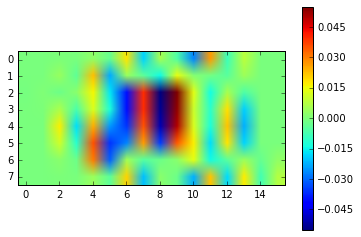

In [47]:
from sklearn.metrics import roc_auc_score

init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    for i in range(5):
        #<run optimizer operation>
        #loss_i = <compute loss at iteration i>
        loss_i = train_function(X_train, y_train)

        print("loss at iter %i:%.4f" % (i, loss_i))
        
        #print(y_train.shape)
        #preds = predict_function(X_train)
        #print(preds.shape)
        #print(preds[0:100])
        #print(y_train[0:100])
        #print(y_test.shape)
        
        print("train auc:",roc_auc_score(y_train, predict_function(X_train)))
        print("test auc:",roc_auc_score(y_test, predict_function(X_test)))

    
    print ("resulting weights:")
    #weights.
    print(sess.run(weights))
    plt.imshow(sess.run(weights).reshape(8, -1))
    plt.colorbar();

# Bonus: my1stNN
Your ultimate task for this week is to build your first neural network [almost] from scratch and pure tensorflow.

This time you will same digit recognition problem, but at a larger scale
* images are now 28x28
* 10 different digits
* 50k samples

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) NN should already have ive you an edge over logistic regression.

__[bonus score]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! The milestones would be 95%/97.5%/98.5% accuraсy on test set.

__SPOILER!__
At the end of the notebook you will find a few tips and frequently made mistakes. If you feel enough might to shoot yourself in the foot without external assistance, we encourage you to do so, but if you encounter any unsurpassable issues, please do look there before mailing us.

In [48]:
#from mnist import load_dataset
from preprocessed_mnist import load_dataset

#[down]loading the original MNIST dataset.
#Please note that you should only train your NN on _train sample,
# _val can be used to evaluate out-of-sample error, compare models or perform early-stopping
# _test should be hidden under a rock untill final evaluation... But we both know it is near impossible to catch you evaluating on it.
X_train,y_train,X_val,y_val,X_test,y_test = load_dataset()

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

Using TensorFlow backend.


(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


5


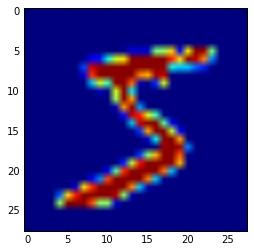

In [49]:
plt.imshow(X_train[0])
print(y_train[0])

In [50]:
sum = 0
for i in range(10):
    sum_i = np.sum(y_train == i)
    sum += sum_i
    print(sum_i)
print("total: ", sum)
print(28*28)

4932
5678
4968
5101
4859
4506
4951
5175
4842
4988
total:  50000
784


In [51]:
print(X_train[0].reshape(-1,).shape)
print(X_train.shape[0])
print(X_train.shape[1] * X_train.shape[2])

(784,)
50000
784


In [52]:
def flatten(X):
    return X.reshape([X.shape[0], X.shape[1] * X.shape[2]])

X_train = flatten(X_train)
X_val = flatten(X_val)
X_test = flatten(X_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [53]:
n_labels = 10
n_pixels = 28 * 28 
n_neurons = 200

In [54]:
pipo = 0.01 * np.random.randn(2,3)
print(pipo)

[[ 0.00162587 -0.01870118  0.01398498]
 [-0.01363686  0.00082639 -0.01141457]]


In [55]:
# Neural Network setup
#* np.sqrt(2.0/(784))
sigma = 0.001
sigma = 1e-6

W1 = tf.Variable(initial_value = np.sqrt(1 / n_pixels) * np.random.randn(n_pixels, n_neurons), dtype='float32')
b1 = tf.Variable(initial_value = np.zeros([n_neurons]), dtype='float32')

W2 = tf.Variable(initial_value = np.sqrt(1 / n_neurons) * np.random.randn(n_neurons, n_neurons), dtype='float32')
b2 = tf.Variable(initial_value = np.zeros([n_neurons]), dtype='float32')

W = tf.Variable(initial_value = np.zeros([n_neurons, n_labels]), dtype='float32')
b = tf.Variable(initial_value = np.zeros([n_labels]), dtype='float32')

weights = tf.Variable(initial_value=np.zeros([n_pixels, n_labels]), dtype='float32')
biases = tf.Variable(initial_value=np.zeros([n_labels]), dtype='float32')

input_X = tf.placeholder('float32',shape=(None, n_pixels))
input_y = tf.placeholder('uint8', shape=(None,))

print(input_X)
print(input_y)
print(weights)

print(W1)
print(b1)
print(W2)
print(b2)
print(W)
print(b)

Tensor("Placeholder_6:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_7:0", shape=(?,), dtype=uint8)
<tf.Variable 'Variable_9:0' shape=(784, 10) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(784, 200) dtype=float32_ref>
<tf.Variable 'Variable_4:0' shape=(200,) dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=(200, 200) dtype=float32_ref>
<tf.Variable 'Variable_6:0' shape=(200,) dtype=float32_ref>
<tf.Variable 'Variable_7:0' shape=(200, 10) dtype=float32_ref>
<tf.Variable 'Variable_8:0' shape=(10,) dtype=float32_ref>


In [56]:
#<here you could just as well create computation graph>

predicted_y = tf.nn.softmax(tf.matmul(input_X, weights) + biases)
print(predicted_y)
predictions = tf.argmax(predicted_y, axis=1)
print(predictions)

Tensor("Softmax_1:0", shape=(?, 10), dtype=float32)
Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [57]:
#<this may or may not be a good place to evaluating loss and optimizer>

y_onehot = tf.one_hot(input_y, n_labels, dtype='float32')
print(y_onehot)

loss = - tf.reduce_mean(y_onehot * tf.log(predicted_y + 1e-10))
print(loss)

#optimizer = tf.train.MomentumOptimizer(0.001, 0.9).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
print(optimizer)

Tensor("one_hot_1:0", shape=(?, 10), dtype=float32)
Tensor("Neg_3:0", shape=(), dtype=float32)
name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable_9/ApplyAdam"
input: "^Adam/update_Variable_10/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [58]:
# Neural Network setup

z1 = tf.matmul(input_X, W1) + b1
z2 = tf.sigmoid(z1)

z3 = tf.matmul(z2, W2) + b2
z4 = tf.sigmoid(z3)

nn_predicted_y = tf.nn.softmax(tf.matmul(z4, W) + b)
print(nn_predicted_y)

nn_predictions = tf.argmax(nn_predicted_y, axis=1)
print(nn_predictions)

nn_loss = - tf.reduce_mean(y_onehot * tf.log(nn_predicted_y + 1e-10))

# L2 regularization added
reg = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2)
nn_loss = nn_loss + 1e-5 * reg

print(nn_loss)

nn_optimizer = tf.train.MomentumOptimizer(0.2, 0.95).minimize(nn_loss)
#nn_optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(nn_loss)
#nn_optimizer = tf.train.AdamOptimizer(0.01).minimize(nn_loss)
print(nn_optimizer)

Tensor("Softmax_2:0", shape=(?, 10), dtype=float32)
Tensor("ArgMax_2:0", shape=(?,), dtype=int64)
Tensor("add_18:0", shape=(), dtype=float32)
name: "Momentum_1"
op: "NoOp"
input: "^Momentum_1/update_Variable_3/ApplyMomentum"
input: "^Momentum_1/update_Variable_4/ApplyMomentum"
input: "^Momentum_1/update_Variable_5/ApplyMomentum"
input: "^Momentum_1/update_Variable_6/ApplyMomentum"
input: "^Momentum_1/update_Variable_7/ApplyMomentum"
input: "^Momentum_1/update_Variable_8/ApplyMomentum"



In [59]:
#<this may be a perfect cell to write a training&evaluation loop in>

In [60]:
from sklearn.utils import shuffle

def train_function(X, y):
    num_samples = X.shape[0]
    batch_size = 20
    X, y = shuffle(X, y)
    
    losses = []
    for i in range(0, num_samples, batch_size):
        end = min(i + batch_size, num_samples)
        #print(i, end)
        batch_xs, batch_ys = X[i:end], y[i:end]
        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={input_X: batch_xs, input_y: batch_ys})
        losses.append(l)
        #print(l)
        
    return np.mean(losses)


def predict_function(X):
    preds = sess.run([predictions], feed_dict={input_X: X})
    #print(type(preds))
    return(np.array(preds).reshape(-1,))

In [61]:
def nn_train_function(X, y):
    num_samples = X.shape[0]
    batch_size = 256
    X, y = shuffle(X, y)
    
    losses = []
    for i in range(0, num_samples, batch_size):
        end = min(i + batch_size, num_samples)
        #print(i, end)
        batch_xs, batch_ys = X[i:end], y[i:end]
        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([nn_optimizer, nn_loss], feed_dict={input_X: batch_xs, input_y: batch_ys})
        losses.append(l)
        #print(l)
        
    return np.mean(losses)


def nn_predict_function(X):
    preds = sess.run([nn_predictions], feed_dict={input_X: X})
    #print(type(preds))
    return(np.array(preds).reshape(-1,))

In [62]:
#<predict & evaluate on test here, right? No cheating pls.>

In [63]:
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    for i in range(5):
        #<run optimizer operation>
        #loss_i = <compute loss at iteration i>
        loss_i = train_function(X_train, y_train)

        print("\nloss at iter %i: %.4f" % (i, loss_i))
        
        preds = predict_function(X_train)
        train_acc = np.sum(y_train == preds) / len(preds)
        print("train accuracy: ", train_acc)
        
        preds = predict_function(X_val)
        val_acc = np.sum(y_val == preds) / len(preds)
        print("val accuracy: ", val_acc)
            
        #print("train auc:",roc_auc_score(y_train, predict_function(X_train)))
        #print("test auc:",roc_auc_score(y_test, predict_function(X_test)))
        
    preds = predict_function(X_test)
    test_acc = np.sum(y_test == preds) / len(preds)
    print("\nTEST ACCURACY: ", test_acc)


loss at iter 0: 0.0453
train accuracy:  0.9102
val accuracy:  0.9161

loss at iter 1: 0.0304
train accuracy:  0.91936
val accuracy:  0.921

loss at iter 2: 0.0286
train accuracy:  0.9248
val accuracy:  0.927

loss at iter 3: 0.0275
train accuracy:  0.92684
val accuracy:  0.9296

loss at iter 4: 0.0269
train accuracy:  0.92486
val accuracy:  0.9289

TEST ACCURACY:  0.9256


In [64]:
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    for i in range(400):
        #<run optimizer operation>
        #loss_i = <compute loss at iteration i>
        loss_i = nn_train_function(X_train, y_train)

        print("\nloss at iter %i: %.4f" % (i, loss_i))
        
        preds = nn_predict_function(X_train)
        train_acc = np.sum(y_train == preds) / len(preds)
        print("train accuracy: ", train_acc)
        
        preds = nn_predict_function(X_val)
        val_acc = np.sum(y_val == preds) / len(preds)
        print("val accuracy: ", val_acc)
            
        #print("train auc:",roc_auc_score(y_train, predict_function(X_train)))
        #print("test auc:",roc_auc_score(y_test, predict_function(X_test)))
        
    preds = nn_predict_function(X_test)
    test_acc = np.sum(y_test == preds) / len(preds)
    print("\nTEST ACCURACY: ", test_acc)


loss at iter 0: 0.2190
train accuracy:  0.59848
val accuracy:  0.6193

loss at iter 1: 0.0905
train accuracy:  0.82846
val accuracy:  0.8437

loss at iter 2: 0.0504
train accuracy:  0.88048
val accuracy:  0.8876

loss at iter 3: 0.0414
train accuracy:  0.89678
val accuracy:  0.9028

loss at iter 4: 0.0377
train accuracy:  0.90642
val accuracy:  0.9128

loss at iter 5: 0.0353
train accuracy:  0.91174
val accuracy:  0.919

loss at iter 6: 0.0335
train accuracy:  0.91612
val accuracy:  0.9207

loss at iter 7: 0.0315
train accuracy:  0.92202
val accuracy:  0.9258

loss at iter 8: 0.0299
train accuracy:  0.92644
val accuracy:  0.9323

loss at iter 9: 0.0287
train accuracy:  0.9292
val accuracy:  0.9339

loss at iter 10: 0.0273
train accuracy:  0.93186
val accuracy:  0.9381

loss at iter 11: 0.0260
train accuracy:  0.935
val accuracy:  0.94

loss at iter 12: 0.0250
train accuracy:  0.9397
val accuracy:  0.9427

loss at iter 13: 0.0237
train accuracy:  0.94326
val accuracy:  0.9473

loss at 

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


# SPOILERS!

Recommended pipeline

* Adapt logistic regression from previous assignment to classify some number against others (e.g. zero vs nonzero)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - softmax (exp over sum of exps) can implemented manually or as T.nnet.softmax (stable)
  - probably better to use STOCHASTIC gradient descent (minibatch)
    - in which case sample should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (sigmoid) instead of softmax
  - You need to train both layers, not just output layer :)
  - Do not initialize layers with zeros (due to symmetry effects). A gaussian noize with small sigma will do.
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal casae this totals to 2 .dot's, 1 softmax and 1 sigmoid
  - __make sure this neural network works better than logistic regression__
  
* Now's the time to try improving the network. Consider layers (size, neuron count),  nonlinearities, optimization methods, initialization - whatever you want, but please avoid convolutions for now.